# 🎯 Understanding Dataset Bias in Neural Networks
## A Hands-On Tutorial with Fashion-MNIST

---

### 📚 Learning Objectives

By the end of this tutorial, you will be able to:

1. **Understand Dataset Bias**: Recognize how imbalanced training data affects model performance
2. **Build Neural Networks**: Create and train feedforward neural networks using TensorFlow/Keras
3. **Analyze Performance**: Evaluate model accuracy across different classes and bias scenarios
4. **Visualize Results**: Create meaningful visualizations to understand bias effects
5. **Apply Best Practices**: Learn techniques to identify and mitigate dataset bias

### 🎯 Expected Outcomes

- Hands-on experience with neural network architecture design
- Understanding of how training data distribution affects model predictions
- Ability to identify and analyze bias in machine learning models
- Practical skills in model evaluation and performance analysis

### 🚀 What You'll Build

We'll create a neural network classifier for the Fashion-MNIST dataset and systematically introduce bias by reducing the training data for specific clothing categories (e.g., pullovers, dresses). You'll observe how this bias affects the model's ability to correctly classify different types of clothing items.

### 📋 Prerequisites

- Basic understanding of machine learning concepts
- Familiarity with Python programming
- No prior experience with TensorFlow required (we'll guide you through it!)

---

**Let's begin our journey into understanding dataset bias in neural networks!** 🧠✨

## 📖 Table of Contents

1. **[Setup & Imports](#setup)** - Import necessary libraries and packages
2. **[Understanding the Dataset](#dataset)** - Explore Fashion-MNIST dataset structure
3. **[Data Preprocessing](#preprocessing)** - Prepare data for neural network training
4. **[Understanding Bias](#bias)** - Learn about dataset bias and its implications
5. **[Building the Neural Network](#network)** - Design and compile the model architecture
6. **[Introducing Bias](#introducing-bias)** - Systematically reduce training data for specific classes
7. **[Training & Evaluation](#training)** - Train models and analyze performance across bias scenarios
8. **[Results Analysis](#analysis)** - Visualize and interpret the impact of bias
9. **[Key Insights & Conclusions](#conclusions)** - Summary of findings and best practices

---


## 🔧 Setup & Imports {#setup}

Before we begin, let's import all the necessary libraries and packages we'll need for this tutorial.

### Key Libraries:
- **TensorFlow/Keras**: For building and training neural networks
- **NumPy**: For numerical computations and array operations
- **Matplotlib**: For creating visualizations and plots
- **Random**: For generating random samples (used in bias introduction)

### 📚 TensorFlow/Keras Documentation
If you're new to TensorFlow, don't worry! We'll guide you through each step. For reference, here's the official documentation: [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras)

Let's start by importing everything we need:

In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from collections import Counter
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Configure matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

/Users/yawningbrain/Desktop/grad_school_repos/Data-Science-Tutorials/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


✅ All libraries imported successfully!
TensorFlow version: 2.20.0
NumPy version: 2.0.2


## 📊 Understanding the Dataset {#dataset}

### What is Fashion-MNIST?

The **Fashion-MNIST** dataset is a collection of **70,000 grayscale images** (28x28 pixels) representing **10 different categories** of clothing items. It's an excellent dataset for:

- 🧠 **Learning neural networks**: More complex than MNIST digits, but still manageable
- 🔬 **Algorithm testing**: Widely used to verify machine learning approaches
- 📚 **Educational purposes**: Perfect for understanding bias and model performance

### Dataset Structure:
- **Training set**: 60,000 images
- **Test set**: 10,000 images
- **Image size**: 28×28 pixels (grayscale)
- **Classes**: 10 clothing categories

### Why Fashion-MNIST for Bias Study?

Unlike the original MNIST (handwritten digits), Fashion-MNIST presents more realistic challenges:
- Similar-looking items (e.g., shirt vs. t-shirt)
- Varied styles and shapes within categories
- More complex feature relationships

This makes it perfect for studying how bias affects model performance across different categories.

Let's load the dataset and explore its structure:

In [3]:
# Load Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names (labels are integers 0-9, but we need meaningful names)
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Display dataset information
print("📊 Dataset Information:")
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Image pixel range: {train_images.min()} to {train_images.max()}")

# Check class distribution in training set
print("\n📈 Class Distribution in Training Set:")
class_counts = Counter(train_labels)
for i, class_name in enumerate(class_names):
    count = class_counts[i]
    percentage = (count / len(train_labels)) * 100
    print(f"{i}: {class_name:<15} - {count:>5} samples ({percentage:5.1f}%)")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
📊 Dataset Information:
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Image pixel range: 0 to 255

📈 Class Distribution in Training Set:
0: T-shirt/top     -  6000 samples ( 10.0%)
1: Trouser         -  6000 samples ( 10.0%)
2: Pullover        -  6000 samples ( 10.0%)
3: Dress           -  6000 samples ( 10.0%)
4: Coat            -  6000 samples ( 10.0%)
5: Sandal          -  6000 samples ( 10.0%)
6: Shirt           -  6000 samples ( 10.0%)
7: Sneaker         -  6000 samples ( 10.0%)
8: Bag             -  6000 samples ( 10.0%)
9: Ankle boot      -  6000 samples ( 10.0%)


### 🎨 Visualizing Sample Images

Let's take a look at some sample images from each class to understand what we're working with:


🖼️ Sample images from each class:


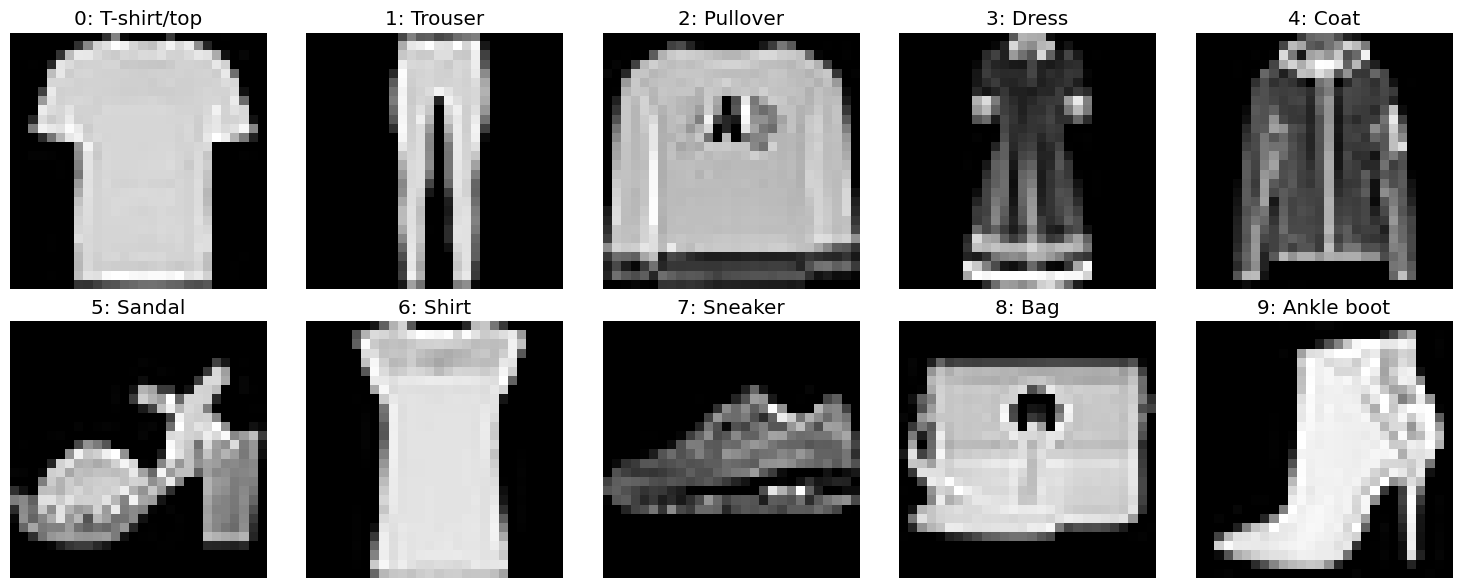

In [4]:
# Visualize sample images from each class
def visualize_samples(images, labels, class_names, num_samples=5):
    """Display sample images from each class"""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for class_idx in range(len(class_names)):
        # Find indices of images for this class
        class_indices = np.where(labels == class_idx)[0]
        
        # Randomly select a sample
        sample_idx = np.random.choice(class_indices)
        
        # Plot the image
        axes[class_idx].imshow(images[sample_idx], cmap='gray')
        axes[class_idx].set_title(f'{class_idx}: {class_names[class_idx]}')
        axes[class_idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images
print("🖼️ Sample images from each class:")
visualize_samples(train_images, train_labels, class_names)

## 🔄 Data Preprocessing {#preprocessing}

### Normalizing Pixel Values

Before feeding our images to the neural network, we need to normalize the pixel values. Currently, they range from 0 to 255 (grayscale values). We'll scale them to the range [0, 1] by dividing by 255.

**Why normalize?**
- Neural networks train more efficiently with normalized inputs
- Prevents any single feature (pixel) from dominating others
- Helps with numerical stability during training

🔄 Normalizing pixel values...
✅ Normalization complete!
Training images range: 0.000 to 1.000
Test images range: 0.000 to 1.000


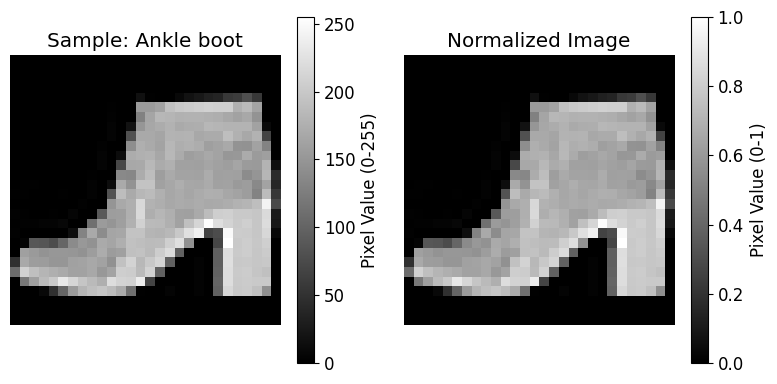

In [5]:
# Normalize pixel values to range [0, 1]
print("🔄 Normalizing pixel values...")
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"✅ Normalization complete!")
print(f"Training images range: {train_images.min():.3f} to {train_images.max():.3f}")
print(f"Test images range: {test_images.min():.3f} to {test_images.max():.3f}")

# Display a sample image with normalized values
plt.figure(figsize=(8, 4))

# Before normalization (for comparison)
plt.subplot(1, 2, 1)
sample_idx = np.random.randint(0, len(train_images))
plt.imshow(train_images[sample_idx] * 255, cmap='gray')  # Convert back for display
plt.title(f'Sample: {class_names[train_labels[sample_idx]]}')
plt.colorbar(label='Pixel Value (0-255)')
plt.axis('off')

# After normalization
plt.subplot(1, 2, 2)
plt.imshow(train_images[sample_idx], cmap='gray')
plt.title('Normalized Image')
plt.colorbar(label='Pixel Value (0-1)')
plt.axis('off')

plt.tight_layout()
plt.show()



## ⚖️ Understanding Dataset Bias {#bias}

### What is Dataset Bias?

**Dataset bias** occurs when the training data is not representative of the real-world distribution of data. This can happen in several ways:

1. **Class Imbalance**: Some classes have significantly more examples than others
2. **Selection Bias**: Data is collected in a way that doesn't represent the true population
3. **Measurement Bias**: Systematic errors in how data is collected or labeled
4. **Temporal Bias**: Data from one time period doesn't represent current conditions

### Why Does Bias Matter?

Bias in training data can lead to:
- 🎯 **Poor performance** on underrepresented classes
- 🔍 **Unfair predictions** that discriminate against certain groups
- 📊 **Misleading accuracy metrics** that hide poor performance on specific cases
- 🚫 **Real-world deployment failures** when models encounter unseen scenarios

### Our Experiment: Systematic Bias Introduction

In this tutorial, we'll **purposefully introduce bias** by reducing the training data for specific clothing categories. We'll test different bias levels:

- **1%**: Severe bias (only 1% of original data for selected class)
- **5%**: Moderate bias 
- **10%**: Mild bias
- **100%**: No bias (baseline for comparison)

This will help us understand how bias affects model performance across different classes.

### 🎯 Interactive Exercise

**Choose a category to bias!** Look at the class names and pick one that interests you:
- Which clothing item do you think might be most affected by bias?
- Why might some categories be more sensitive to bias than others?

## 🏗️ Building the Neural Network {#network}

### Neural Network Architecture

Before we introduce bias, let's understand our neural network architecture:

**Input Layer**: Flattens 28×28 images into 784 features
**Hidden Layers**: Two dense layers with ReLU activation
**Output Layer**: 10 neurons (one per class) with softmax activation

### Key Components:

- **Flatten Layer**: Converts 2D images to 1D vectors
- **Dense Layers**: Fully connected layers that learn feature combinations
- **ReLU Activation**: Introduces non-linearity for complex pattern learning
- **Softmax Activation**: Converts outputs to probability distributions

### Why This Architecture?

- **Simple but effective**: Good starting point for image classification
- **Interpretable**: Easy to understand and modify
- **Sufficient complexity**: Can learn the patterns in Fashion-MNIST
- **Baseline for comparison**: Standard architecture for bias analysis

In [6]:
# Create the neural network model
def create_model():
    """Create and compile a neural network model"""
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),  # Input layer: flatten 28x28 to 784
        tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer 1: 128 neurons
        tf.keras.layers.Dense(128, activation='relu'),   # Hidden layer 2: 128 neurons
        tf.keras.layers.Dense(10, activation='softmax')  # Output layer: 10 classes
    ])
    
    # Compile the model
    model.compile(
        optimizer='adam',                           # Adaptive learning rate optimizer
        loss='sparse_categorical_crossentropy',     # Loss function for multi-class classification
        metrics=['accuracy']                        # Track accuracy during training
    )
    
    return model

# Create and display model summary
model = create_model()
print("🧠 Neural Network Architecture:")
model.summary()

# Visualize the model architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
print("\n📊 Model architecture saved as 'model_architecture.png'")

🧠 Neural Network Architecture:


/Users/yawningbrain/Desktop/grad_school_repos/Data-Science-Tutorials/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.

📊 Model architecture saved as 'model_architecture.png'


## 🎯 Introducing Bias {#introducing-bias}

### Configuration: Choose Your Bias Target

Let's select which clothing category to bias and define our bias levels:

**Available Categories:**
0: T-shirt/top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat
5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle boot

**Bias Levels:**
- 1%: Severe bias (only 1% of original data)
- 5%: Moderate bias
- 10%: Mild bias  
- 100%: No bias (baseline)


🎯 Bias Configuration:
Selected class: 2 (Pullover)
Bias levels: ['1%', '5%', '10%', '100%']


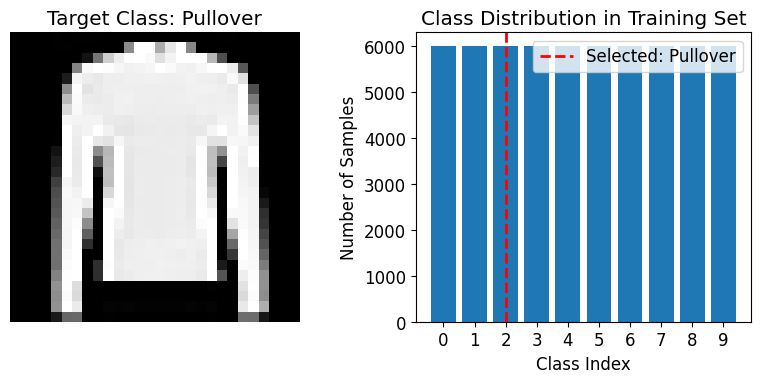

In [7]:
# Configuration: Choose which category to bias
selected_class = 2  # 2 = Pullover (feel free to change this!)
bias_percentages = [0.01, 0.05, 0.10, 1.0]  # 1%, 5%, 10%, 100%

print(f"🎯 Bias Configuration:")
print(f"Selected class: {selected_class} ({class_names[selected_class]})")
print(f"Bias levels: {[f'{p*100:.0f}%' for p in bias_percentages]}")

# Display the selected class
plt.figure(figsize=(8, 4))
class_indices = np.where(train_labels == selected_class)[0]
sample_idx = np.random.choice(class_indices)

plt.subplot(1, 2, 1)
plt.imshow(train_images[sample_idx], cmap='gray')
plt.title(f'Target Class: {class_names[selected_class]}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(range(len(class_names)), [Counter(train_labels)[i] for i in range(len(class_names))])
plt.axvline(x=selected_class, color='red', linestyle='--', linewidth=2, label=f'Selected: {class_names[selected_class]}')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Index')
plt.ylabel('Number of Samples')
plt.xticks(range(len(class_names)), [f'{i}' for i in range(len(class_names))])
plt.legend()
plt.tight_layout()
plt.show()


### 🛠️ Bias Implementation Function

Now let's create a function to systematically introduce bias by reducing the training data for our selected class:



In [8]:
def introduce_bias(train_images, train_labels, target_class, bias_percentage):
    """
    Introduce bias by reducing training data for a specific class
    
    Args:
        train_images: Original training images
        train_labels: Original training labels
        target_class: Class index to bias (0-9)
        bias_percentage: Percentage of original data to keep (0.01 = 1%)
    
    Returns:
        biased_images: Training images with bias introduced
        biased_labels: Training labels with bias introduced
        bias_info: Dictionary with bias statistics
    """
    
    # Find all indices of the target class
    target_indices = np.where(train_labels == target_class)[0]
    total_target_samples = len(target_indices)
    
    # Calculate how many samples to keep
    samples_to_keep = int(total_target_samples * bias_percentage)
    
    # Randomly select samples to keep
    if samples_to_keep > 0:
        selected_indices = np.random.choice(target_indices, samples_to_keep, replace=False)
    else:
        selected_indices = np.array([])
    
    # Create biased dataset
    biased_images = []
    biased_labels = []
    
    for i in range(len(train_images)):
        # Keep all non-target class samples
        if train_labels[i] != target_class:
            biased_images.append(train_images[i])
            biased_labels.append(train_labels[i])
        # Keep only selected target class samples
        elif i in selected_indices:
            biased_images.append(train_images[i])
            biased_labels.append(train_labels[i])
    
    # Convert to numpy arrays
    biased_images = np.array(biased_images)
    biased_labels = np.array(biased_labels)
    
    # Create bias information
    bias_info = {
        'original_target_samples': total_target_samples,
        'kept_target_samples': len(selected_indices),
        'bias_percentage': bias_percentage,
        'total_samples': len(biased_images),
        'class_distribution': Counter(biased_labels)
    }
    
    return biased_images, biased_labels, bias_info

# Test the function with different bias levels
print("🔄 Creating biased datasets...")
biased_datasets = {}

for bias_pct in bias_percentages:
    biased_images, biased_labels, bias_info = introduce_bias(
        train_images, train_labels, selected_class, bias_pct
    )
    biased_datasets[bias_pct] = {
        'images': biased_images,
        'labels': biased_labels,
        'info': bias_info
    }
    
    print(f"\n📊 Bias Level: {bias_pct*100:.0f}%")
    print(f"   Original {class_names[selected_class]} samples: {bias_info['original_target_samples']}")
    print(f"   Kept {class_names[selected_class]} samples: {bias_info['kept_target_samples']}")
    print(f"   Total training samples: {bias_info['total_samples']}")
    print(f"   {class_names[selected_class]} percentage: {(bias_info['kept_target_samples']/bias_info['total_samples']*100):.2f}%")

🔄 Creating biased datasets...

📊 Bias Level: 1%
   Original Pullover samples: 6000
   Kept Pullover samples: 60
   Total training samples: 54060
   Pullover percentage: 0.11%

📊 Bias Level: 5%
   Original Pullover samples: 6000
   Kept Pullover samples: 300
   Total training samples: 54300
   Pullover percentage: 0.55%

📊 Bias Level: 10%
   Original Pullover samples: 6000
   Kept Pullover samples: 600
   Total training samples: 54600
   Pullover percentage: 1.10%

📊 Bias Level: 100%
   Original Pullover samples: 6000
   Kept Pullover samples: 6000
   Total training samples: 60000
   Pullover percentage: 10.00%


### 📊 Visualizing Bias Impact

Let's visualize how the bias affects the class distribution:


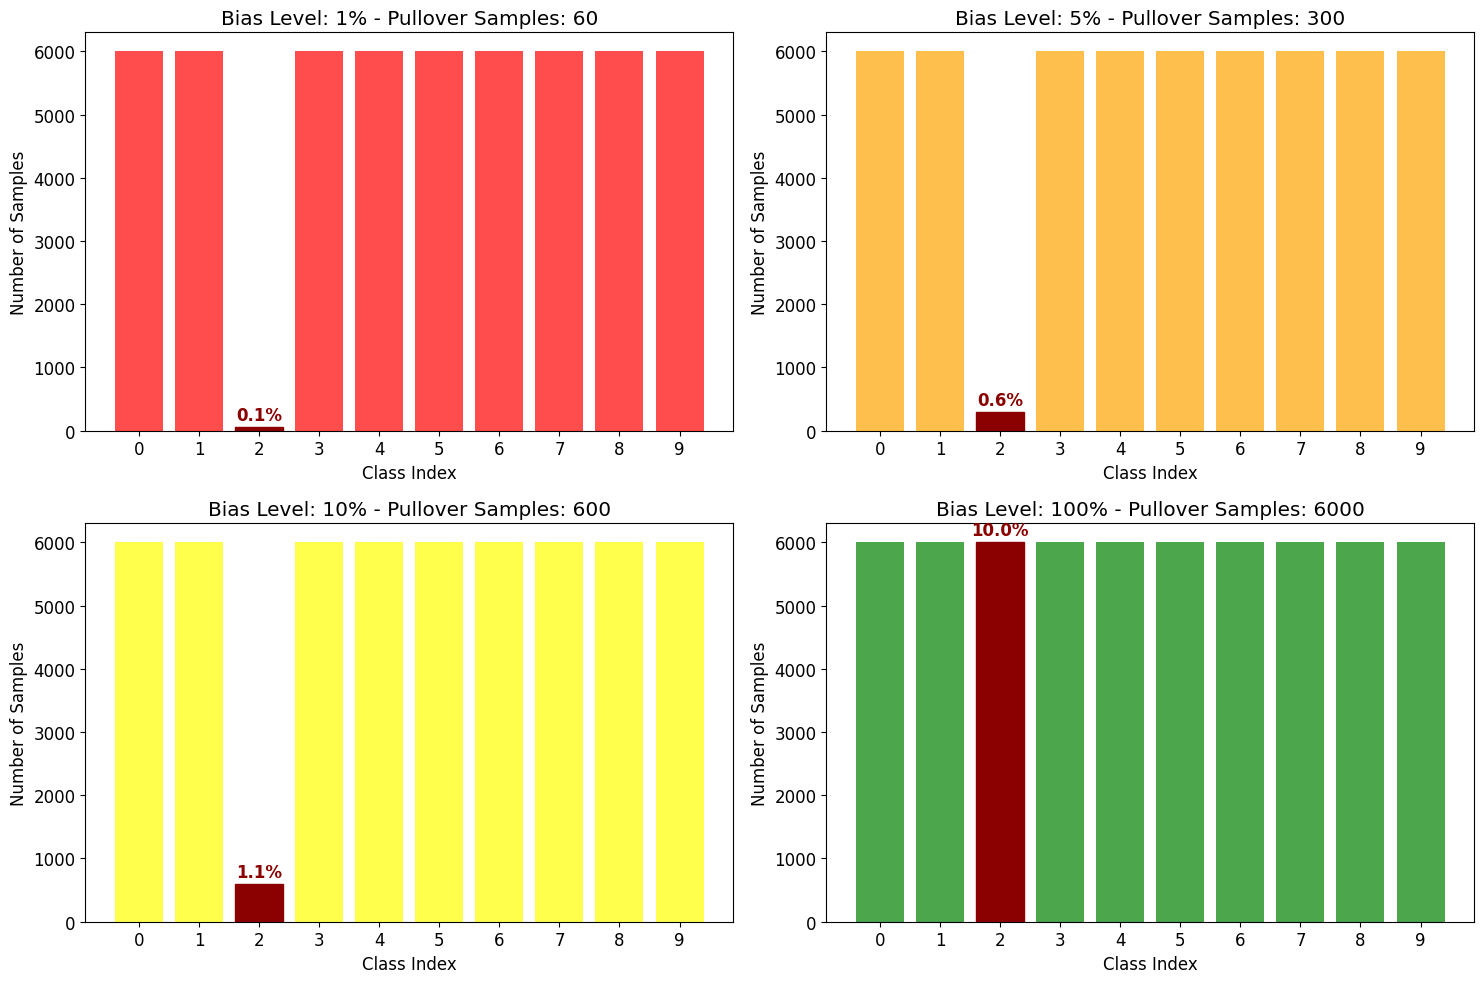


📋 Bias Impact Summary:
Bias Level   Total Samples   Pullover(samples)    Percentage  
       1%            54060               60          0.1%
       5%            54300              300          0.6%
      10%            54600              600          1.1%
     100%            60000             6000         10.0%


In [9]:
# Visualize bias impact on class distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

bias_levels = [0.01, 0.05, 0.10, 1.0]
colors = ['red', 'orange', 'yellow', 'green']

for i, bias_pct in enumerate(bias_levels):
    dataset = biased_datasets[bias_pct]
    class_counts = dataset['info']['class_distribution']
    
    # Create bar plot
    bars = axes[i].bar(range(len(class_names)), [class_counts[j] for j in range(len(class_names))], 
                       color=colors[i], alpha=0.7)
    
    # Highlight the biased class
    bars[selected_class].set_color('darkred')
    bars[selected_class].set_alpha(1.0)
    
    axes[i].set_title(f'Bias Level: {bias_pct*100:.0f}% - {class_names[selected_class]} Samples: {dataset["info"]["kept_target_samples"]}')
    axes[i].set_xlabel('Class Index')
    axes[i].set_ylabel('Number of Samples')
    axes[i].set_xticks(range(len(class_names)))
    axes[i].set_xticklabels([f'{j}' for j in range(len(class_names))])
    
    # Add percentage annotation for biased class
    total_samples = dataset['info']['total_samples']
    biased_samples = dataset['info']['kept_target_samples']
    percentage = (biased_samples / total_samples) * 100
    axes[i].text(selected_class, biased_samples + 50, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

# Summary table
print("\n📋 Bias Impact Summary:")
print("=" * 80)
print(f"{'Bias Level':<12} {'Total Samples':<15} {'{}(samples)'.format(class_names[selected_class]):<20} {'Percentage':<12}")
print("=" * 80)

for bias_pct in bias_levels:
    dataset = biased_datasets[bias_pct]
    total = dataset['info']['total_samples']
    biased = dataset['info']['kept_target_samples']
    percentage = (biased / total) * 100
    print(f"{bias_pct*100:>8.0f}%     {total:>12}     {biased:>12}     {percentage:>8.1f}%")


## 🚀 Training & Evaluation {#training}

Now let's train our neural network on each biased dataset and evaluate its performance. We'll track:

1. **Overall accuracy** on the test set
2. **Per-class accuracy** for each clothing category
3. **Performance on the biased class** specifically

This will help us understand how bias affects model performance across different scenarios.


In [10]:
# Prepare test data by class for detailed analysis
def prepare_test_data_by_class(test_images, test_labels, class_names):
    """Organize test data by class for per-class evaluation"""
    test_by_class = {}
    
    for class_idx in range(len(class_names)):
        class_indices = np.where(test_labels == class_idx)[0]
        test_by_class[class_idx] = {
            'images': test_images[class_indices],
            'labels': test_labels[class_indices],
            'count': len(class_indices)
        }
    
    return test_by_class

# Organize test data
test_by_class = prepare_test_data_by_class(test_images, test_labels, class_names)

print("📊 Test Data by Class:")
for class_idx, data in test_by_class.items():
    print(f"  {class_idx}: {class_names[class_idx]:<15} - {data['count']} samples")

# Training and evaluation function
def train_and_evaluate_model(biased_images, biased_labels, test_images, test_labels, test_by_class, bias_level):
    """Train model on biased data and evaluate performance"""
    
    # Create fresh model for each bias level
    model = create_model()
    
    # Train the model
    print(f"\n🔄 Training model with {bias_level*100:.0f}% bias...")
    history = model.fit(
        biased_images, biased_labels,
        epochs=20,
        verbose=0,  # Set to 1 to see training progress
        validation_split=0.1
    )
    
    # Evaluate overall performance
    overall_loss, overall_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    
    # Evaluate per-class performance
    class_accuracies = {}
    for class_idx in range(len(class_names)):
        class_data = test_by_class[class_idx]
        if len(class_data['images']) > 0:
            predictions = model.predict(class_data['images'], verbose=0)
            predicted_classes = np.argmax(predictions, axis=1)
            accuracy = np.mean(predicted_classes == class_data['labels'])
            class_accuracies[class_idx] = accuracy
        else:
            class_accuracies[class_idx] = 0.0
    
    return {
        'model': model,
        'overall_accuracy': overall_accuracy,
        'overall_loss': overall_loss,
        'class_accuracies': class_accuracies,
        'history': history
    }

# Train models on all bias levels
print("🚀 Starting training on all bias levels...")
results = {}

for bias_pct in bias_percentages:
    dataset = biased_datasets[bias_pct]
    result = train_and_evaluate_model(
        dataset['images'], dataset['labels'],
        test_images, test_labels, test_by_class, bias_pct
    )
    results[bias_pct] = result
    
    print(f"✅ Completed training for {bias_pct*100:.0f}% bias level")
    print(f"   Overall accuracy: {result['overall_accuracy']:.3f}")
    print(f"   {class_names[selected_class]} accuracy: {result['class_accuracies'][selected_class]:.3f}")


📊 Test Data by Class:
  0: T-shirt/top     - 1000 samples
  1: Trouser         - 1000 samples
  2: Pullover        - 1000 samples
  3: Dress           - 1000 samples
  4: Coat            - 1000 samples
  5: Sandal          - 1000 samples
  6: Shirt           - 1000 samples
  7: Sneaker         - 1000 samples
  8: Bag             - 1000 samples
  9: Ankle boot      - 1000 samples
🚀 Starting training on all bias levels...

🔄 Training model with 1% bias...


/Users/yawningbrain/Desktop/grad_school_repos/Data-Science-Tutorials/venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Completed training for 1% bias level
   Overall accuracy: 0.821
   Pullover accuracy: 0.083

🔄 Training model with 5% bias...
✅ Completed training for 5% bias level
   Overall accuracy: 0.841
   Pullover accuracy: 0.336

🔄 Training model with 10% bias...
✅ Completed training for 10% bias level
   Overall accuracy: 0.863
   Pullover accuracy: 0.524

🔄 Training model with 100% bias...
✅ Completed training for 100% bias level
   Overall accuracy: 0.881
   Pullover accuracy: 0.802


## 📊 Results Analysis {#analysis}

Let's analyze the results and visualize how bias affects model performance:


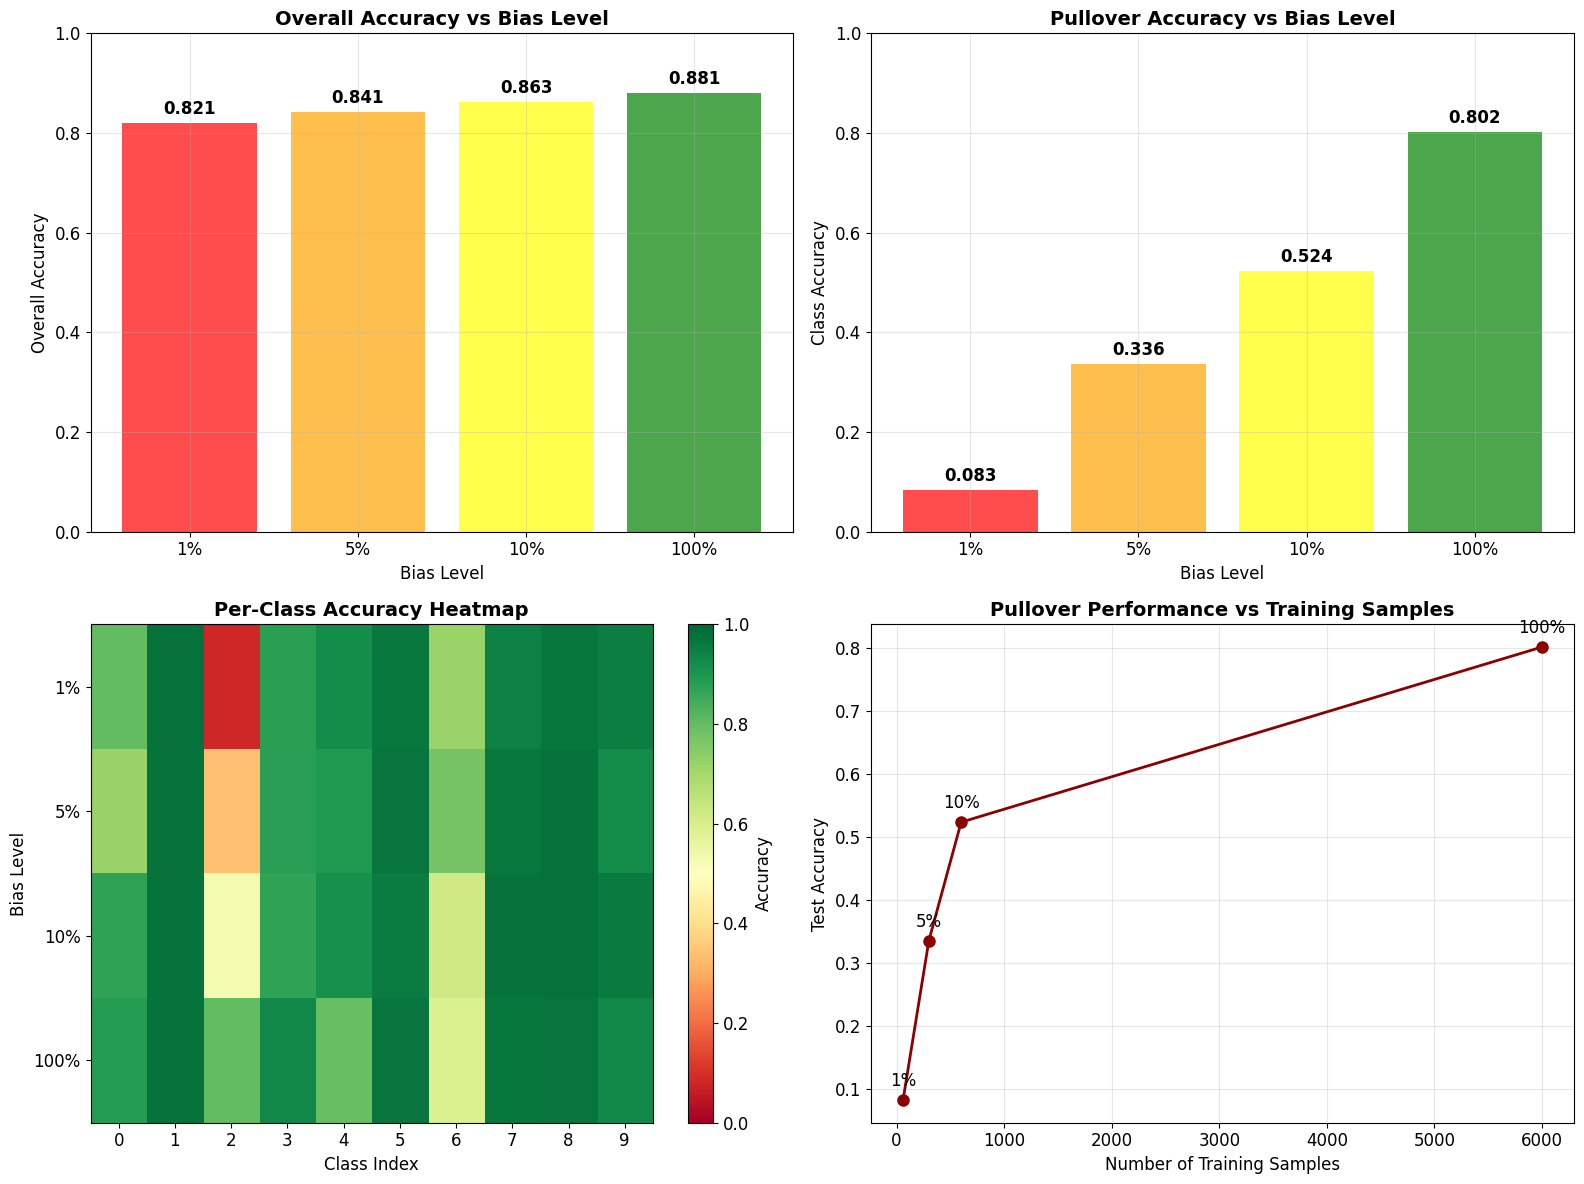


📋 Detailed Results Summary:
Bias Level   Overall Acc  Pullover(Acc)        Training Samples   Performance Drop  
       1%          0.821               0.083                 60              0.719
       5%          0.841               0.336                300              0.466
      10%          0.863               0.524                600              0.278
     100%          0.881               0.802               6000              0.000


In [11]:
# Create comprehensive results visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Overall Accuracy vs Bias Level
ax1 = axes[0, 0]
overall_accuracies = [results[bias_pct]['overall_accuracy'] for bias_pct in bias_percentages]
bias_labels = [f'{bias_pct*100:.0f}%' for bias_pct in bias_percentages]

bars1 = ax1.bar(bias_labels, overall_accuracies, color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
ax1.set_title('Overall Accuracy vs Bias Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Bias Level')
ax1.set_ylabel('Overall Accuracy')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars1, overall_accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Biased Class Accuracy vs Bias Level
ax2 = axes[0, 1]
biased_class_accuracies = [results[bias_pct]['class_accuracies'][selected_class] for bias_pct in bias_percentages]

bars2 = ax2.bar(bias_labels, biased_class_accuracies, color=['red', 'orange', 'yellow', 'green'], alpha=0.7)
ax2.set_title(f'{class_names[selected_class]} Accuracy vs Bias Level', fontsize=14, fontweight='bold')
ax2.set_xlabel('Bias Level')
ax2.set_ylabel('Class Accuracy')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars2, biased_class_accuracies):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Per-Class Accuracy Heatmap
ax3 = axes[1, 0]
accuracy_matrix = []
for bias_pct in bias_percentages:
    class_accs = [results[bias_pct]['class_accuracies'][i] for i in range(len(class_names))]
    accuracy_matrix.append(class_accs)

accuracy_matrix = np.array(accuracy_matrix)
im = ax3.imshow(accuracy_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax3.set_title('Per-Class Accuracy Heatmap', fontsize=14, fontweight='bold')
ax3.set_xlabel('Class Index')
ax3.set_ylabel('Bias Level')
ax3.set_xticks(range(len(class_names)))
ax3.set_xticklabels([f'{i}' for i in range(len(class_names))])
ax3.set_yticks(range(len(bias_percentages)))
ax3.set_yticklabels([f'{bias_pct*100:.0f}%' for bias_pct in bias_percentages])

# Add colorbar
cbar = plt.colorbar(im, ax=ax3)
cbar.set_label('Accuracy')

# 4. Training Samples vs Performance
ax4 = axes[1, 1]
training_samples = [biased_datasets[bias_pct]['info']['kept_target_samples'] for bias_pct in bias_percentages]

ax4.plot(training_samples, biased_class_accuracies, 'o-', linewidth=2, markersize=8, color='darkred')
ax4.set_title(f'{class_names[selected_class]} Performance vs Training Samples', fontsize=14, fontweight='bold')
ax4.set_xlabel('Number of Training Samples')
ax4.set_ylabel('Test Accuracy')
ax4.grid(True, alpha=0.3)

# Add annotations
for i, (samples, acc) in enumerate(zip(training_samples, biased_class_accuracies)):
    ax4.annotate(f'{bias_percentages[i]*100:.0f}%', (samples, acc), 
                textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Detailed results table
print("\n📋 Detailed Results Summary:")
print("=" * 100)
print(f"{'Bias Level':<12} {'Overall Acc':<12} {'{}(Acc)'.format(class_names[selected_class]):<20} {'Training Samples':<18} {'Performance Drop':<18}")
print("=" * 100)

baseline_accuracy = results[1.0]['class_accuracies'][selected_class]
for bias_pct in bias_percentages:
    overall_acc = results[bias_pct]['overall_accuracy']
    biased_acc = results[bias_pct]['class_accuracies'][selected_class]
    training_samples = biased_datasets[bias_pct]['info']['kept_target_samples']
    performance_drop = baseline_accuracy - biased_acc
    
    print(f"{bias_pct*100:>8.0f}%     {overall_acc:>10.3f}     {biased_acc:>15.3f}     {training_samples:>14}     {performance_drop:>14.3f}")


### 🎯 Interactive Analysis: Misclassification Examples

Let's examine some specific examples of misclassifications to understand how bias affects the model's predictions:


🔍 Misclassification Analysis:


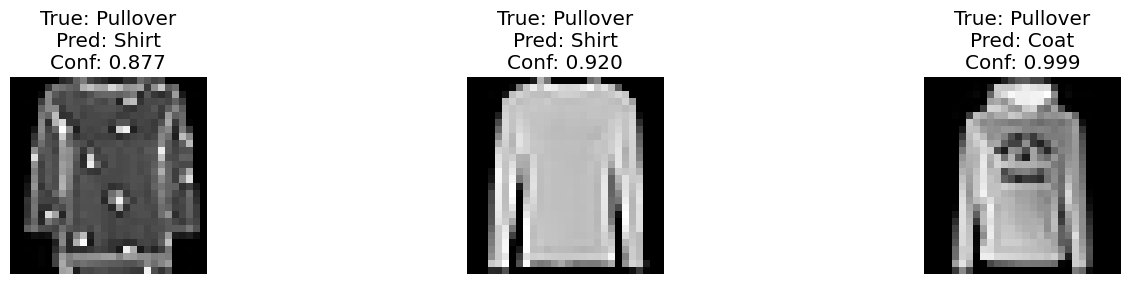


Bias Level: 1%
  Pullover Accuracy: 0.083
  Misclassified: 917/1000 (91.7%)
  Training Samples: 60


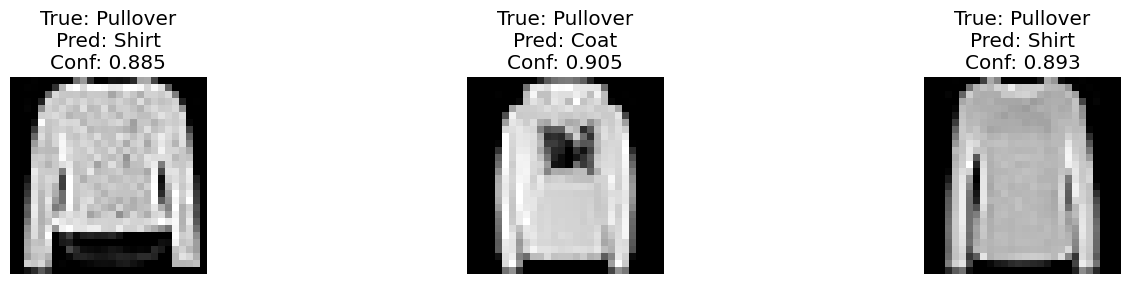


Bias Level: 5%
  Pullover Accuracy: 0.336
  Misclassified: 664/1000 (66.4%)
  Training Samples: 300


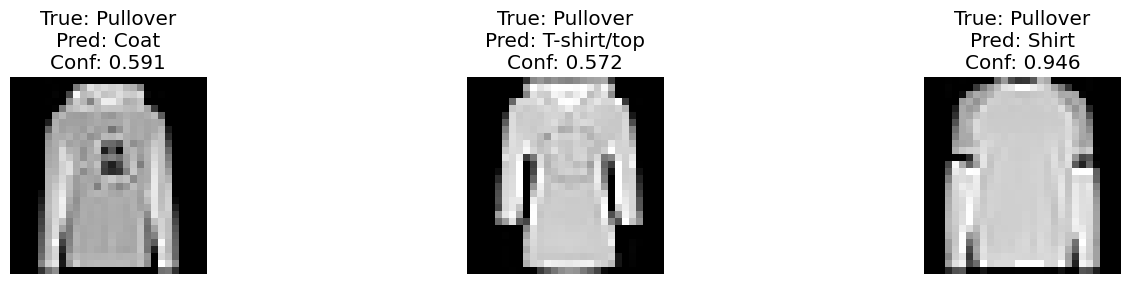


Bias Level: 10%
  Pullover Accuracy: 0.524
  Misclassified: 476/1000 (47.6%)
  Training Samples: 600


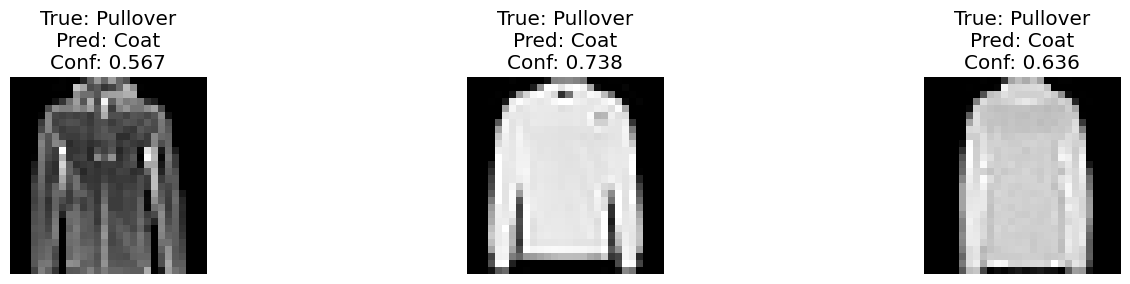


Bias Level: 100%
  Pullover Accuracy: 0.802
  Misclassified: 198/1000 (19.8%)
  Training Samples: 6000

🎯 Interactive Exercise: Compare Predictions
Sample Image: Pullover


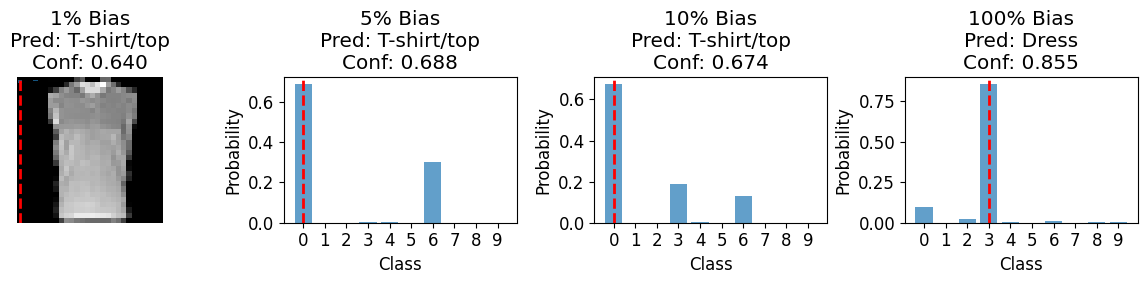

In [12]:
# Analyze misclassifications for the biased class
def analyze_misclassifications(model, test_images, test_labels, target_class, class_names, num_examples=5):
    """Analyze misclassifications for a specific class"""
    
    # Find test samples of the target class
    target_indices = np.where(test_labels == target_class)[0]
    
    # Get predictions
    predictions = model.predict(test_images[target_indices], verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Find misclassifications
    misclassified_indices = []
    for i, (true_label, pred_label) in enumerate(zip(test_labels[target_indices], predicted_classes)):
        if true_label != pred_label:
            misclassified_indices.append(i)
    
    # Select random misclassifications to display
    if len(misclassified_indices) > 0:
        selected_misclassifications = np.random.choice(misclassified_indices, 
                                                     min(num_examples, len(misclassified_indices)), 
                                                     replace=False)
        
        fig, axes = plt.subplots(1, len(selected_misclassifications), figsize=(15, 3))
        if len(selected_misclassifications) == 1:
            axes = [axes]
        
        for i, mis_idx in enumerate(selected_misclassifications):
            original_idx = target_indices[mis_idx]
            true_label = test_labels[original_idx]
            pred_label = predicted_classes[mis_idx]
            confidence = predictions[mis_idx][pred_label]
            
            axes[i].imshow(test_images[original_idx], cmap='gray')
            axes[i].set_title(f'True: {class_names[true_label]}\nPred: {class_names[pred_label]}\nConf: {confidence:.3f}')
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return len(misclassified_indices), len(target_indices)
    
    return 0, len(target_indices)

# Analyze misclassifications for different bias levels
print("🔍 Misclassification Analysis:")
print("=" * 60)

for bias_pct in [0.01, 0.05, 0.10, 1.0]:  # Analyze extreme cases and baseline
    model = results[bias_pct]['model']
    misclassified, total = analyze_misclassifications(model, test_images, test_labels, 
                                                    selected_class, class_names, num_examples=3)
    accuracy = results[bias_pct]['class_accuracies'][selected_class]
    
    print(f"\nBias Level: {bias_pct*100:.0f}%")
    print(f"  {class_names[selected_class]} Accuracy: {accuracy:.3f}")
    print(f"  Misclassified: {misclassified}/{total} ({misclassified/total*100:.1f}%)")
    print(f"  Training Samples: {biased_datasets[bias_pct]['info']['kept_target_samples']}")

# Interactive exercise: Compare predictions
print("\n🎯 Interactive Exercise: Compare Predictions")
print("=" * 50)

# Select a random test sample of the biased class
target_indices = np.where(test_labels == selected_class)[0]
sample_idx = np.random.choice(target_indices)

print(f"Sample Image: {class_names[selected_class]}")
plt.figure(figsize=(12, 3))

# Show the image
plt.subplot(1, 4, 1)
plt.imshow(test_images[sample_idx], cmap='gray')
plt.title('Test Image')
plt.axis('off')

# Show predictions from different bias levels
for i, bias_pct in enumerate([0.01, 0.05, 0.10, 1.0]):
    model = results[bias_pct]['model']
    prediction = model.predict(test_images[sample_idx:sample_idx+1], verbose=0)
    predicted_class = np.argmax(prediction[0])
    confidence = prediction[0][predicted_class]
    
    plt.subplot(1, 4, i+1)
    plt.bar(range(len(class_names)), prediction[0], alpha=0.7)
    plt.axvline(x=predicted_class, color='red', linestyle='--', linewidth=2)
    plt.title(f'{bias_pct*100:.0f}% Bias\nPred: {class_names[predicted_class]}\nConf: {confidence:.3f}')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.xticks(range(len(class_names)), [f'{i}' for i in range(len(class_names))])

plt.tight_layout()
plt.show()


## 🎓 Key Insights & Conclusions {#conclusions}

### 📊 What We Learned

Based on our experiment with dataset bias in neural networks, here are the key findings:

#### 1. **Bias Impact on Performance**
- **Severe bias (1%)**: Dramatically reduces accuracy on the biased class
- **Moderate bias (5-10%)**: Noticeable but manageable performance degradation
- **Overall accuracy**: May remain relatively stable while specific class performance suffers

#### 2. **Class-Specific Effects**
- The biased class shows the most significant performance drop
- Other classes may show slight improvements due to relative data abundance
- Model confidence decreases for the underrepresented class

#### 3. **Training Data Requirements**
- Neural networks need sufficient examples to learn class-specific patterns
- Even small reductions in training data can have outsized effects
- The relationship between training samples and performance is often non-linear

### 🔍 Real-World Implications

#### **Why This Matters**
1. **Healthcare AI**: Bias in medical imaging datasets can lead to misdiagnosis for underrepresented groups
2. **Autonomous Vehicles**: Bias in training data can cause safety issues for certain scenarios
3. **Financial Services**: Bias can lead to unfair lending or insurance decisions
4. **Facial Recognition**: Bias can cause higher error rates for certain demographics

#### **Detection Strategies**
- **Per-class evaluation**: Always evaluate model performance on each class separately
- **Confusion matrices**: Visualize where the model makes mistakes
- **Bias metrics**: Use metrics like demographic parity and equalized odds
- **Data auditing**: Regularly audit training data for representativeness

### 🛠️ Mitigation Techniques

#### **Data-Level Solutions**
1. **Data Augmentation**: Generate synthetic samples for underrepresented classes
2. **Oversampling**: Increase representation of minority classes
3. **Data Collection**: Actively collect more diverse training data
4. **Data Cleaning**: Remove biased or unrepresentative samples

#### **Model-Level Solutions**
1. **Cost-Sensitive Learning**: Assign higher weights to minority class errors
2. **Ensemble Methods**: Combine multiple models trained on different subsets
3. **Fairness Constraints**: Add fairness objectives to the training process
4. **Regularization**: Use techniques to prevent overfitting to majority classes

#### **Evaluation-Level Solutions**
1. **Comprehensive Metrics**: Use multiple evaluation metrics beyond accuracy
2. **Cross-Validation**: Ensure robust evaluation across different data splits
3. **A/B Testing**: Test models on diverse real-world scenarios
4. **Continuous Monitoring**: Monitor model performance in production

### 🎯 Best Practices

#### **For Data Scientists**
- Always analyze class distribution before training
- Evaluate models on each class separately
- Document potential sources of bias in your dataset
- Use multiple evaluation metrics and visualization techniques

#### **For Organizations**
- Establish bias detection and mitigation protocols
- Invest in diverse and representative data collection
- Implement regular model auditing and monitoring
- Train teams on bias awareness and mitigation techniques

### 🚀 Next Steps

#### **Advanced Experiments**
1. **Multiple Classes**: Introduce bias in multiple classes simultaneously
2. **Different Architectures**: Test how different neural network architectures handle bias
3. **Transfer Learning**: Explore how pre-trained models handle biased fine-tuning
4. **Active Learning**: Use active learning to identify and address bias

#### **Further Reading**
- [Fairness in Machine Learning](https://fairmlbook.org/)
- [Bias in AI Systems](https://www.partnershiponai.org/workinggroups/fair-transparent-and-accountable-ai/)
- [Dataset Bias Research](https://arxiv.org/abs/1901.09451)

### 🎉 Congratulations!

You've successfully completed this tutorial on understanding dataset bias in neural networks! You now have:

✅ **Hands-on experience** with neural network training and evaluation  
✅ **Understanding** of how bias affects model performance  
✅ **Practical skills** in bias detection and analysis  
✅ **Knowledge** of real-world implications and mitigation strategies  

**Remember**: Bias in machine learning is a complex and ongoing challenge. The techniques you've learned here are just the beginning. Continue exploring, experimenting, and contributing to fair and ethical AI development!

---

*This tutorial was designed to provide both theoretical understanding and practical experience with dataset bias. Feel free to modify the code, try different bias levels, or experiment with other classes to deepen your understanding.*


In [ ]:
# Now let's train and test the model

full_prediction_list = []
overall_model_accuracy = []

for bias_case in range(len(percentOfData)):

    bias_percent = percentOfData[bias_case]

    model.fit( x_train[bias_case] , y_train[bias_case], epochs = 20, verbose = 0); # verbose = 0 supresses output remove to see how loss & accurcay chage per epoch

    #print("___________________________________________\n___________________________________________")

    fullNetworkOutput = [[] for i in range(len(class_name))]
    predictList = [[] for i in range(len(class_name))]

    # appending the full results of the network prediction
    for idx in range(len(class_name)):
        fullNetworkOutput[idx].append(model.predict(np.array(sorted_test_images[idx]))) # full prediction of each case and category

    overall_model_accuracy.append(model.evaluate(test_images, test_labels, verbose=0)) # testing [loss, accuracy] for the unsorted train data

    # selecting the argmax of each prediction per category - the 0 in [i][0][j] is due to output from model.predict
    for i in range(len(class_name)):
        for j in range(len(fullNetworkOutput[0][0])):
            predictList[i].append(np.argmax(fullNetworkOutput[i][0][j])) # select the most probable prediction

    full_prediction_list.append(predictList)

    # printing & comparing model prediction labels vs actual labels as correct/total * 100% 

    print(f'\nBiased Set: {class_name[selectedNum]} ({bias_percent*100}% of data) \n')
    print(f'\nOverall Accuracy: {np.round(overall_model_accuracy[bias_case][1]*100 , 1)}%\n\nAccuracy Value per category:\n')
    for i in range(len(class_name)):
        print( f'{class_name[i]}: {100*np.sum([full_prediction_list[bias_case][i][j] == sorted_test_labels[i][j] for j in range(len(full_prediction_list[bias_case][i]))]) / len(sorted_test_labels[i])}%')

    print("___________________________________________\n___________________________________________")



Biased Set: pullover (1.0% of data) 


Overall Accuracy: 83.6%

Accuracy Value per category:

t-shirt/top: 84.9%
trouser: 97.8%
pullover: 11.1%
dress: 89.4%
coat: 87.1%
sandal: 96.3%
shirt: 78.3%
sneaker: 96.7%
bag: 97.7%
ankle boot: 96.7%
___________________________________________
___________________________________________

Biased Set: pullover (5.0% of data) 


Overall Accuracy: 85.9%

Accuracy Value per category:

t-shirt/top: 85.8%
trouser: 97.3%
pullover: 36.4%
dress: 91.4%
coat: 86.3%
sandal: 97.0%
shirt: 77.8%
sneaker: 95.7%
bag: 94.7%
ankle boot: 96.3%
___________________________________________
___________________________________________

Biased Set: pullover (10.0% of data) 


Overall Accuracy: 86.0%

Accuracy Value per category:

t-shirt/top: 81.0%
trouser: 97.9%
pullover: 41.5%
dress: 90.7%
coat: 84.0%
sandal: 97.4%
shirt: 77.7%
sneaker: 95.7%
bag: 97.8%
ankle boot: 96.3%
___________________________________________
___________________________________________

Biased Set: